In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [12]:
df=pd.read_csv("homeprices (mul ti variate).csv")
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [13]:
## as there is nan value in bedrooms so use data preprocessing (handling null values)
import math
median_bedroom=math.floor(df.bedrooms.median())
df.bedrooms=df.bedrooms.fillna(median_bedroom)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [14]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [15]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [16]:
reg.intercept_

221323.00186540384

In [17]:
reg.predict([[3600,3,30]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([597962.89583192])

In [18]:
## evaluating the model
from sklearn.model_selection import train_test_split
X=np.array(df[['area','bedrooms','age']])
y=np.array(df['price'])
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
regr = linear_model.LinearRegression() 
regr.fit(X_train, y_train) 


[[2.6e+03 3.0e+00 2.0e+01]
 [3.0e+03 4.0e+00 1.5e+01]
 [3.2e+03 4.0e+00 1.8e+01]
 [3.6e+03 3.0e+00 3.0e+01]
 [4.0e+03 5.0e+00 8.0e+00]
 [4.1e+03 6.0e+00 8.0e+00]]


LinearRegression()

In [24]:
y_pred=reg.predict(X_test)
print(X_test)
print(y_pred)
print(y_test)
print('Area', reg.predict([[2600,3,20]]))

[[4.1e+03 6.0e+00 8.0e+00]
 [3.0e+03 4.0e+00 1.5e+01]]
[795258.55102673 602590.07937407]
[810000 565000]
Area [518217.63297611]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)*100
print(score)

94.56784877907374


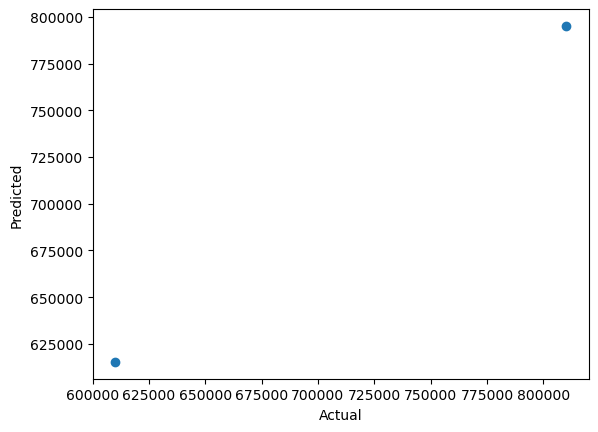

In [66]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

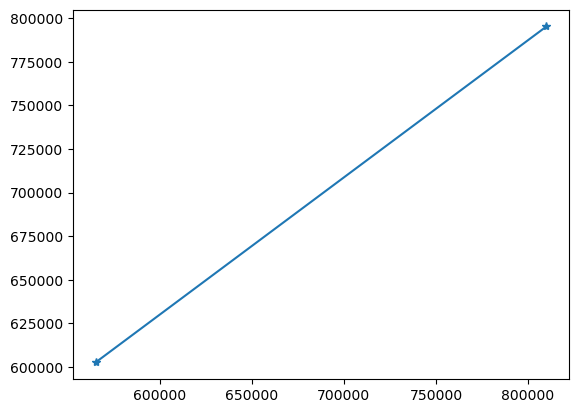

In [25]:
plt.plot(y_test,y_pred,marker='*')

In [33]:
regr.predict([[4600,6,8]])

array([803800.])

In [34]:
regr.coef_

array([   126., -31800.,  -8100.])

In [36]:
regr.intercept_

479799.99999999977